#### Import Library

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.ticker

pd.set_option('display.max_columns', 100)
plt.style.use('seaborn')

#### Import dataset College.csv

In [86]:
df = pd.read_csv(r'C:\Users\Ramadhoni\Documents\Bootcamp Data Scientist\Machine Learning\Unsupervised Learning\College.csv')

#### Quick Look Data

Melihat 5 Data Teratas

In [87]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Mengecek jumlah baris & kolom pada dataset

In [88]:
df.shape

(777, 19)

Mengecek nama-nama kolom pada dataset

In [89]:
df.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

Mengecek tipe data, nama kolom

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

Mengecek Jumlah Missing Value (NA) tiap kolom

In [91]:
df.isna().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

Cek Duplicated Data

In [92]:
df.duplicated().any()

False

Cek Value Aneh / Missing Value tiap kolom

In [93]:
nama_kolom = ['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate']

In [94]:
for i in nama_kolom:
    print(i, df[i].unique())

Unnamed: 0 ['Abilene Christian University' 'Adelphi University' 'Adrian College'
 'Agnes Scott College' 'Alaska Pacific University' 'Albertson College'
 'Albertus Magnus College' 'Albion College' 'Albright College'
 'Alderson-Broaddus College' 'Alfred University' 'Allegheny College'
 'Allentown Coll. of St. Francis de Sales' 'Alma College'
 'Alverno College' 'American International College' 'Amherst College'
 'Anderson University' 'Andrews University' 'Angelo State University'
 'Antioch University' 'Appalachian State University' 'Aquinas College'
 'Arizona State University Main campus' 'Arkansas College (Lyon College)'
 'Arkansas Tech University' 'Assumption College'
 'Auburn University-Main Campus' 'Augsburg College' 'Augustana College IL'
 'Augustana College' 'Austin College' 'Averett College' 'Baker University'
 'Baldwin-Wallace College' 'Barat College' 'Bard College'
 'Barnard College' 'Barry University' 'Baylor University' 'Beaver College'
 'Bellarmine College' 'Belmont Abbey Coll

#### Berdasarkan hasil pengecekan dari Quick Look Data. disimpulkan bahwa dataset tersebut memiliki 777 Baris dan 19 Kolom, tipe data (dtype) tiap kolom sudah sesuai dengan isi data object dan int sehingga tidak perlu mengubah tipe data tiap kolom. Dan tidak ada missing value (NA) ataupun strange Value tiap baris data, lalu tidak ada duplicate di dataset tersebut. Karena di notes Homework ada ketentuan "Dimohon untuk tidak menghapus baris data apapun, walaupun terdeteksi sebagai outliers, karena tujuan kita adalah agar seluruh universitas bisa dicluster sesuai dengan karakteristik mereka masing-masing." . Maka dataset tersebut tidak perlu di cleaning lagi

## Exploratory Data Analysist

#### Buat Analisa & Visualisasi Per kolom / Variabel untuk mendapatkan Insight 

[Text(0.5, 0, ''), Text(0, 0.5, 'Jumlah Universitas Swasta & Non Swasta')]

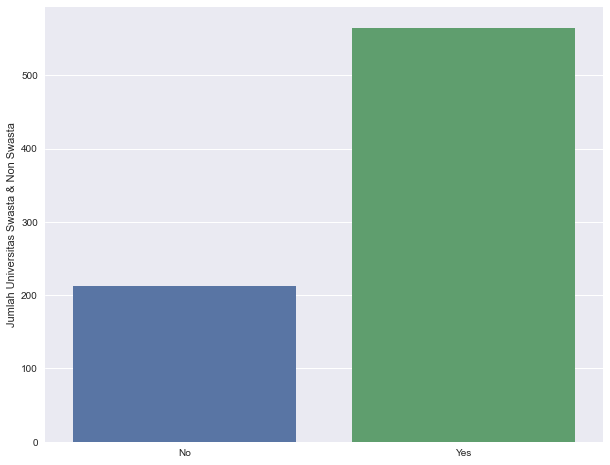

In [95]:
plt.subplots(figsize = (10,8))
# Membandingkan banyak jumlah antara Universitas Swasta dengan Universitas Non-Swasta

private_data = df.groupby('Private')['Unnamed: 0'].count().reset_index()
plt1= sns.barplot(x = 'Private', y = 'Unnamed: 0', data = private_data)
plt1.set(xlabel = '', ylabel= 'Jumlah Universitas Swasta & Non Swasta')

[Text(0.5, 0, ''), Text(0, 0.5, 'Pendaftar')]

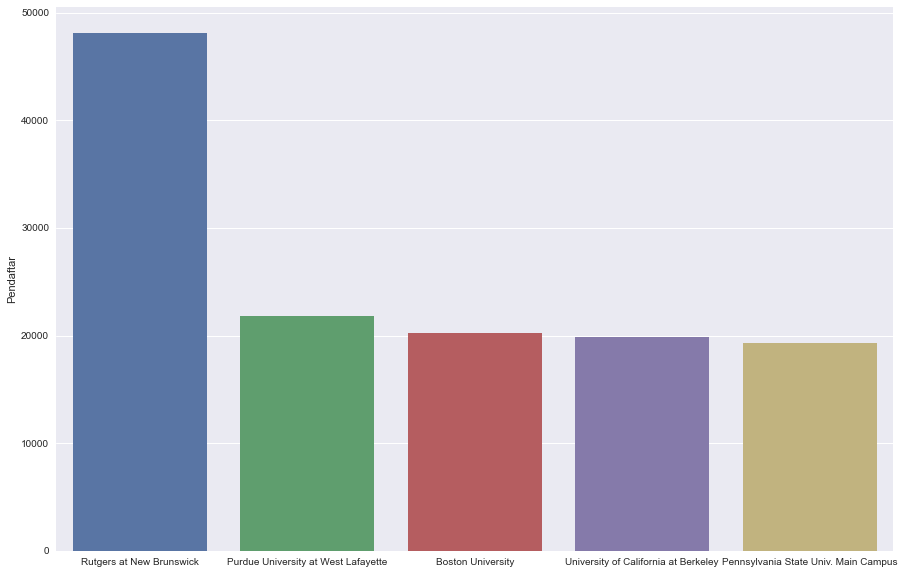

In [96]:
# Top5 Universitas dengan Pendaftar terbanyak
plt.subplots(figsize = (15,10))
top5_apps_data = df[['Unnamed: 0', 'Apps']].sort_values(by ='Apps', ascending = False).head(5)
plt1= sns.barplot(x = 'Unnamed: 0', y = 'Apps', data = top5_apps_data)
plt1.set(xlabel = '', ylabel= 'Pendaftar')

<ipython-input-97-1fa77c0b840d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_accept_data['Percentage']= round((df['Accept']/df['Apps']*100), 2)


[Text(0.5, 0, ''), Text(0, 0.5, 'Persentase Diterima')]

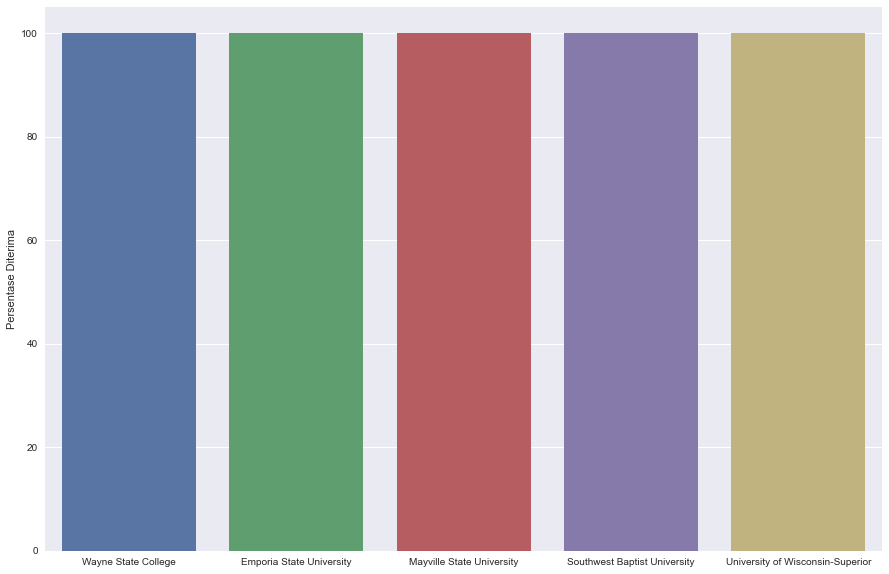

In [97]:
# Top5 Persentase/Kemungkinan Jumlah siswa yang di terima dari banyaknya pendaftar
plt.subplots(figsize = (15,10))
top5_accept_data = df[['Unnamed: 0','Apps','Accept']]
top5_accept_data['Percentage']= round((df['Accept']/df['Apps']*100), 2)
top5_accept_data = top5_accept_data.sort_values(by='Percentage', ascending = False).head(5)
plt1= sns.barplot(x = 'Unnamed: 0', y = 'Percentage', data = top5_accept_data)
plt1.set(xlabel = '', ylabel= 'Persentase Diterima')

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Jumlah orang yang terdaftar sebagai mahasiswa')]

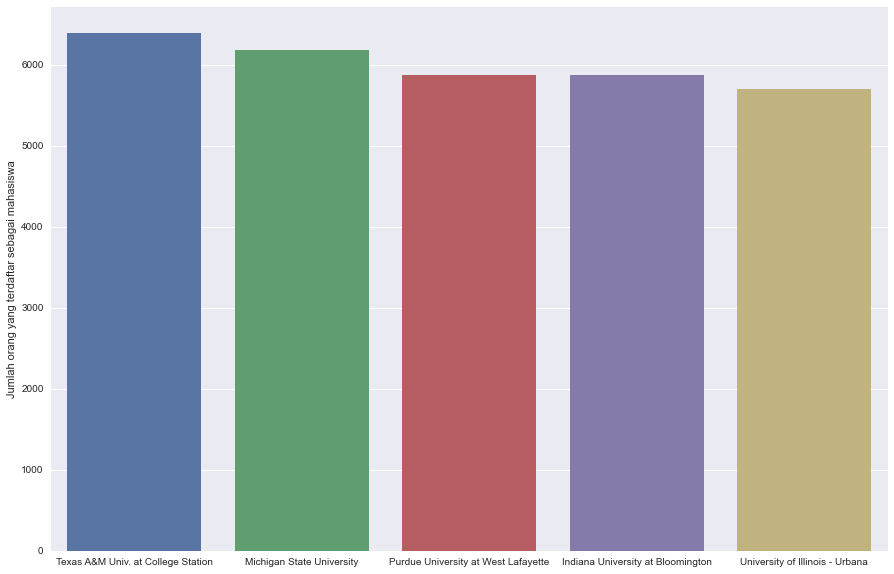

In [98]:
# Top 5 Jumlah orang yang terdaftar sebagai mahasiswa
plt.subplots(figsize = (15,10))
top5_enroll_data = df[['Unnamed: 0', 'Enroll']].sort_values(by ='Enroll', ascending = False).head(5)
plt1= sns.barplot(x = 'Unnamed: 0', y = 'Enroll', data = top5_enroll_data)
plt1.set(xlabel = '', ylabel= 'Jumlah orang yang terdaftar sebagai mahasiswa')

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Persentase mahasiswa yang merupakan top 10% dari SMA asal')]

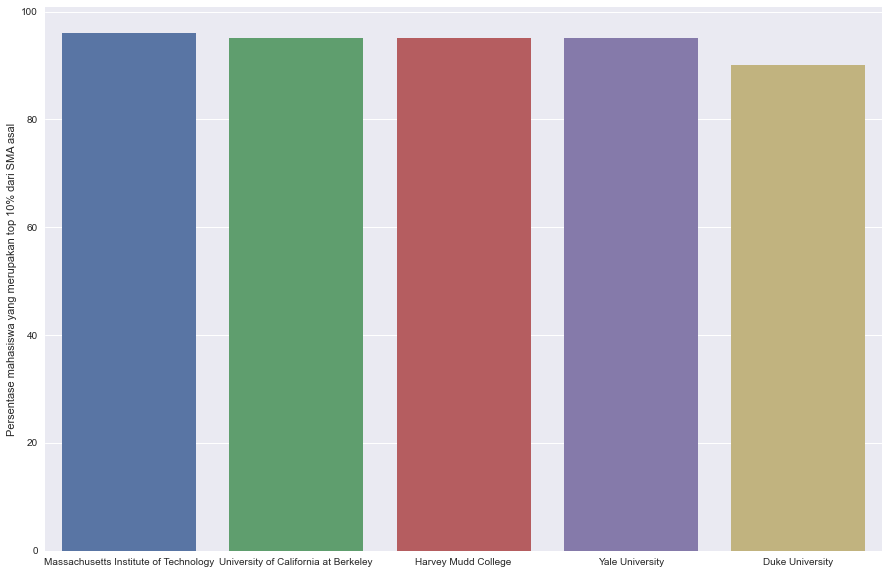

In [99]:
# Top 5 Universitas dengan Persentase mahasiswa yang merupakan top 10% dari SMA asal
plt.subplots(figsize = (15,10))
top5_Top10perc_data = df[['Unnamed: 0', 'Top10perc']].sort_values(by ='Top10perc', ascending = False).head(5)
plt1= sns.barplot(x = 'Unnamed: 0', y = 'Top10perc', data = top5_Top10perc_data)
plt1.set(xlabel = '', ylabel= 'Persentase mahasiswa yang merupakan top 10% dari SMA asal')

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Persentase mahasiswa yang merupakan top 25% dari SMA asal')]

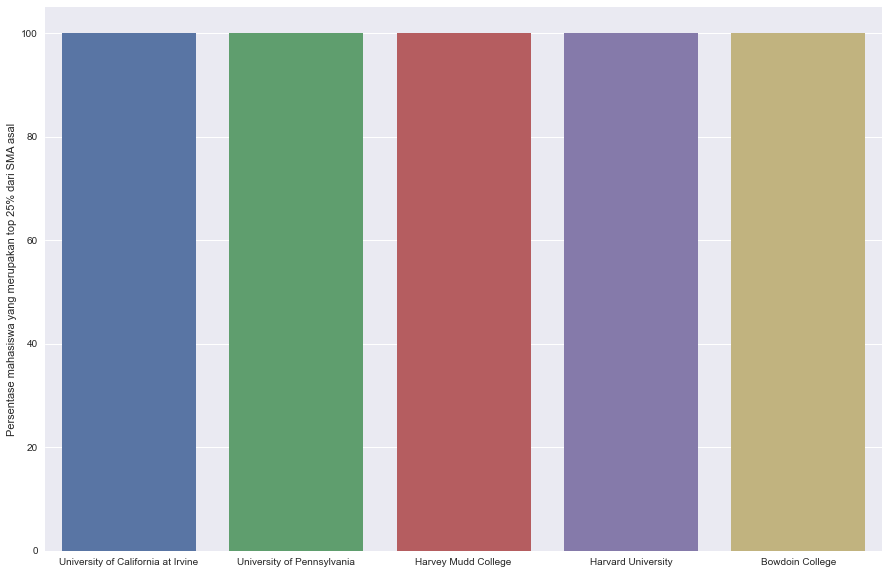

In [100]:
# Top 5 Universitas dengan Persentase mahasiswa yang merupakan top 25% dari SMA asal
plt.subplots(figsize = (15,10))
top5_Top25perc_data = df[['Unnamed: 0', 'Top25perc']].sort_values(by ='Top25perc', ascending = False).head(5)
plt1= sns.barplot(x = 'Unnamed: 0', y = 'Top25perc', data = top5_Top25perc_data)
plt1.set(xlabel = '', ylabel= 'Persentase mahasiswa yang merupakan top 25% dari SMA asal')

[Text(0.5, 0, ''), Text(0, 0.5, 'mahasiswa S1 full time')]

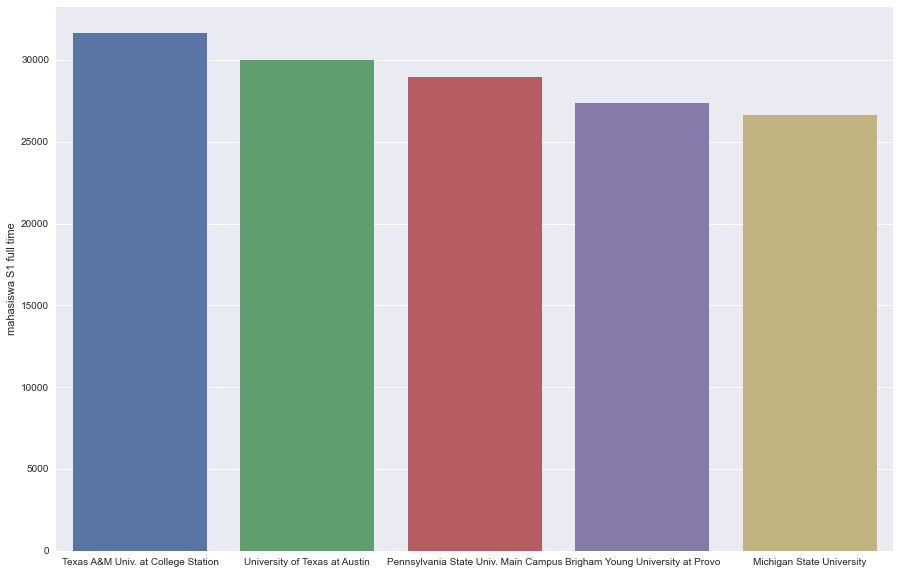

In [101]:
# Top 5 Universitas dengan Mahasiswa S1 Fulltime Terbanyak
plt.subplots(figsize = (15,10))
top5_FUndergrad_data = df[['Unnamed: 0', 'F.Undergrad']].sort_values(by ='F.Undergrad', ascending = False).head(5)
plt1= sns.barplot(x = 'Unnamed: 0', y = 'F.Undergrad', data = top5_FUndergrad_data)
plt1.set(xlabel = '', ylabel= 'mahasiswa S1 full time')

[Text(0.5, 0, ''), Text(0, 0.5, 'Mahasiswa S1 Parttime')]

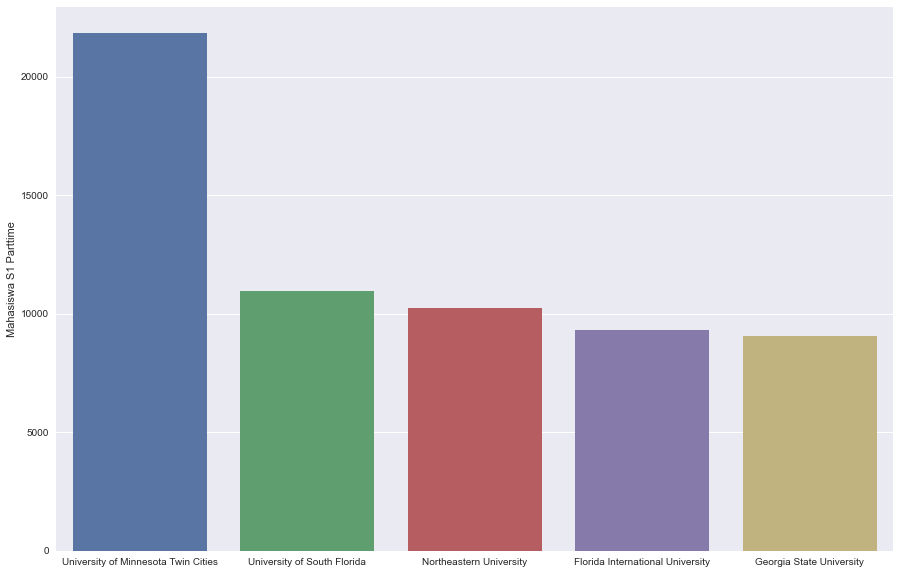

In [102]:
# Top 5 Universitas dengan Mahasiswa S1 Parttime Terbanyak
plt.subplots(figsize = (15,10))
top5_PUndergrad_data = df[['Unnamed: 0', 'P.Undergrad']].sort_values(by ='P.Undergrad', ascending = False).head(5)
plt1= sns.barplot(x = 'Unnamed: 0', y = 'P.Undergrad', data = top5_PUndergrad_data)
plt1.set(xlabel = '', ylabel= 'Mahasiswa S1 Parttime')

[Text(0.5, 0, ''), Text(0, 0.5, 'Biaya kuliah untuk mahasiswa non-lokal')]

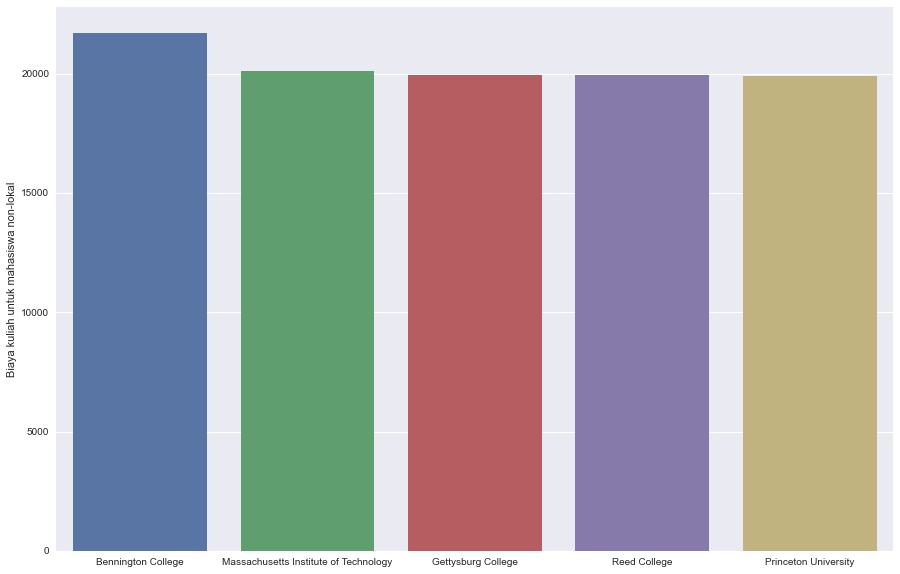

In [103]:
# Top 5 Universitas dengan Biaya kuliah untuk mahasiswa non-lokal termahal
plt.subplots(figsize = (15,10))
top5_Outstate_data = df[['Unnamed: 0', 'Outstate']].sort_values(by ='Outstate', ascending = False).head(5)
plt1= sns.barplot(x = 'Unnamed: 0', y = 'Outstate', data = top5_Outstate_data)
plt1.set(xlabel = '', ylabel= 'Biaya kuliah untuk mahasiswa non-lokal')

[Text(0.5, 0, ''), Text(0, 0.5, 'Biaya Asrama')]

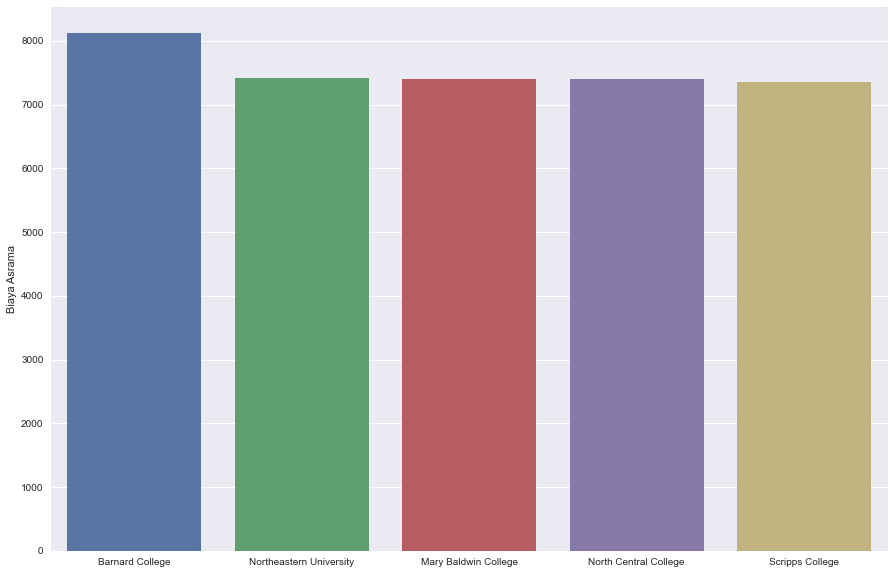

In [104]:
# Top 5 Universitas dengan Biaya Asrama Termahal
plt.subplots(figsize = (15,10))
top5_RoomBoard_data = df[['Unnamed: 0', 'Room.Board']].sort_values(by ='Room.Board', ascending = False).head(5)
plt1= sns.barplot(x = 'Unnamed: 0', y = 'Room.Board', data = top5_RoomBoard_data)
plt1.set(xlabel = '', ylabel= 'Biaya Asrama')

[Text(0.5, 0, ''), Text(0, 0.5, 'Biaya Buku')]

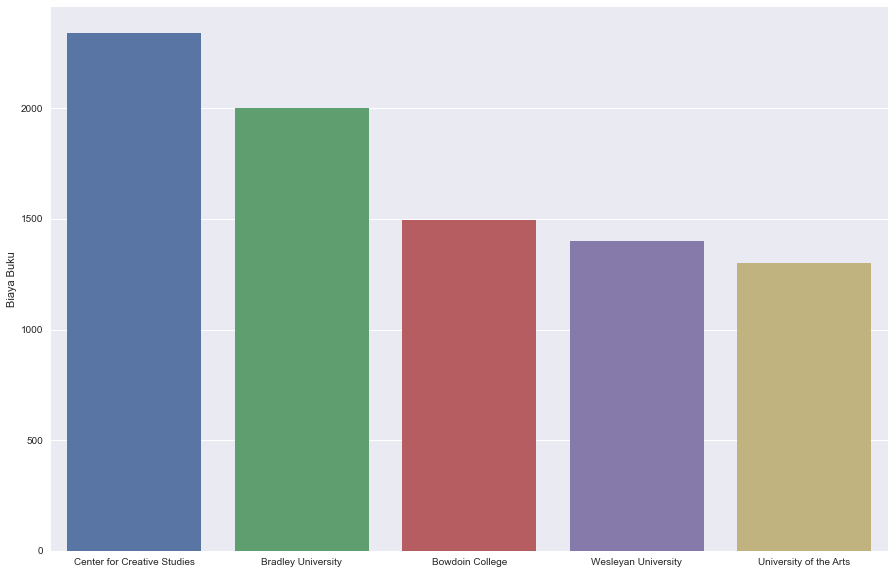

In [105]:
# Top 5 Universitas dengan Biaya Buku Termahal
plt.subplots(figsize = (15,10))
top5_books_data = df[['Unnamed: 0', 'Books']].sort_values(by ='Books', ascending = False).head(5)
plt1= sns.barplot(x = 'Unnamed: 0', y = 'Books', data = top5_books_data)
plt1.set(xlabel = '', ylabel= 'Biaya Buku')

[Text(0.5, 0, ''), Text(0, 0.5, 'Biaya Hidup')]

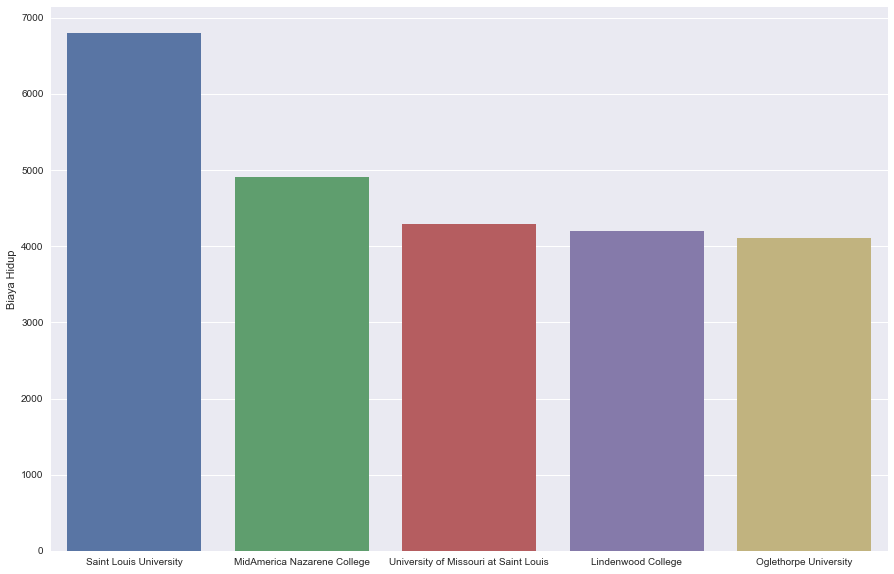

In [106]:
# Top 5 Universitas dengan Biaya Hidup Termahal
plt.subplots(figsize = (15,10))
top5_Personal_data = df[['Unnamed: 0', 'Personal']].sort_values(by ='Personal', ascending = False).head(5)
plt1= sns.barplot(x = 'Unnamed: 0', y = 'Personal', data = top5_Personal_data)
plt1.set(xlabel = '', ylabel= 'Biaya Hidup')


[Text(0.5, 0, ''), Text(0, 0.5, 'Persentase Dosen Bergelar Doktor')]

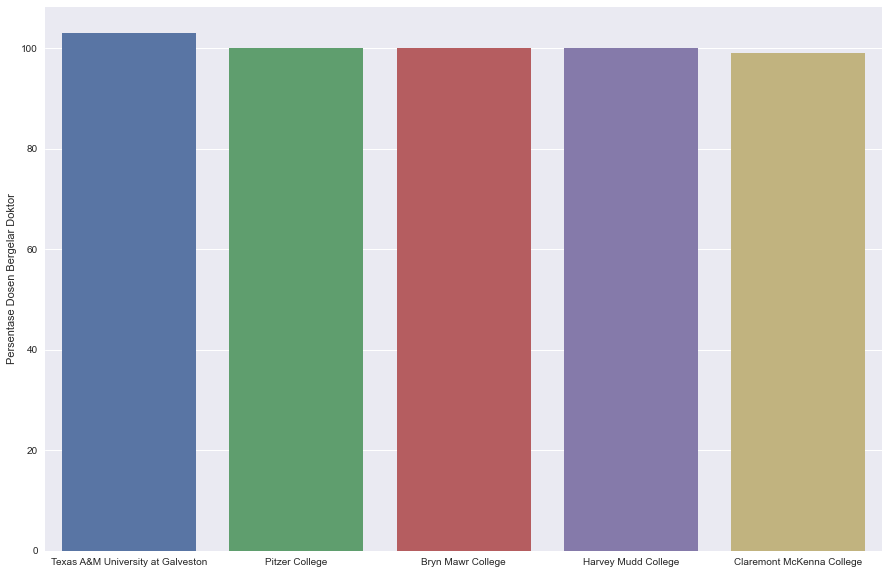

In [107]:
# Top 5 Universitas dengan Persentase Bergelar Doktor Terbanyak
plt.subplots(figsize = (15,10))
top5_PhD_data = df[['Unnamed: 0', 'PhD']].sort_values(by ='PhD', ascending = False).head(5)
plt1= sns.barplot(x = 'Unnamed: 0', y = 'PhD', data = top5_PhD_data)
plt1.set(xlabel = '', ylabel= 'Persentase Dosen Bergelar Doktor')

[Text(0.5, 0, ''),
 Text(0, 0.5, 'Persentase dosen yang memiliki gelar tertinggi di bidang masing-masing')]

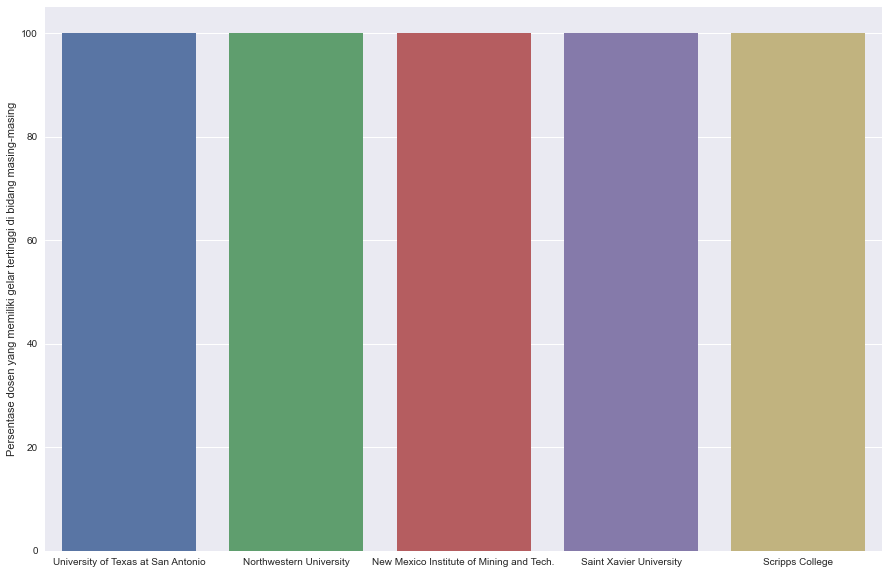

In [108]:
# Top 5 Universitas dengan Persentase dosen yang memiliki gelar tertinggi di bidang masing-masing
plt.subplots(figsize = (15,10))
top5_Terminal_data = df[['Unnamed: 0', 'Terminal']].sort_values(by ='Terminal', ascending = False).head(5)
plt1= sns.barplot(x = 'Unnamed: 0', y = 'Terminal', data = top5_Terminal_data)
plt1.set(xlabel = '', ylabel= 'Persentase dosen yang memiliki gelar tertinggi di bidang masing-masing')

[Text(0.5, 0, ''), Text(0, 0.5, 'Rasio mahasiswa/pengajar terbesar')]

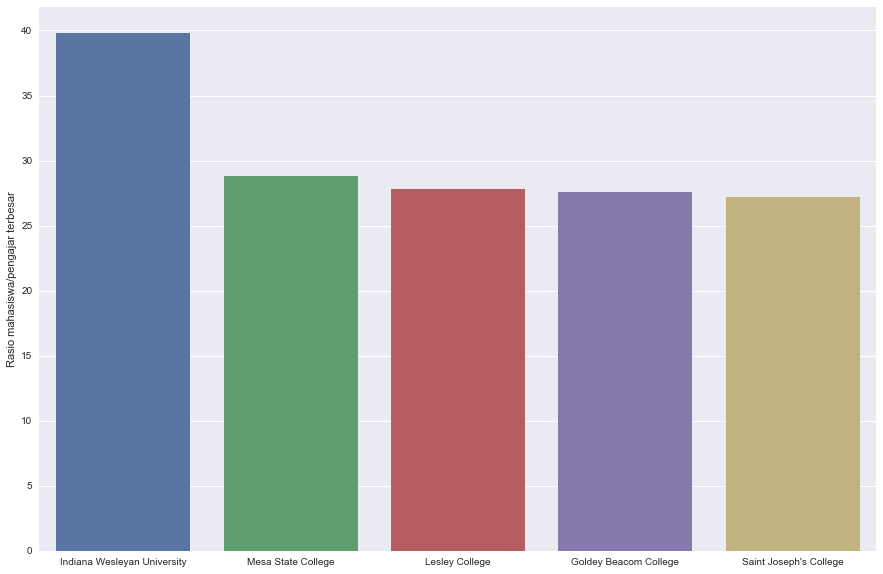

In [109]:
# Top 5 Universitas dengan Rasio mahasiswa/pengajar terbesar
plt.subplots(figsize = (15,10))
top5_SFRatio_data = df[['Unnamed: 0', 'S.F.Ratio']].sort_values(by ='S.F.Ratio', ascending = False).head(5)
plt1= sns.barplot(x = 'Unnamed: 0', y = 'S.F.Ratio', data = top5_SFRatio_data)
plt1.set(xlabel = '', ylabel= 'Rasio mahasiswa/pengajar terbesar')

[Text(0.5, 0, ''), Text(0, 0.5, 'Rasio mahasiswa/pengajar')]

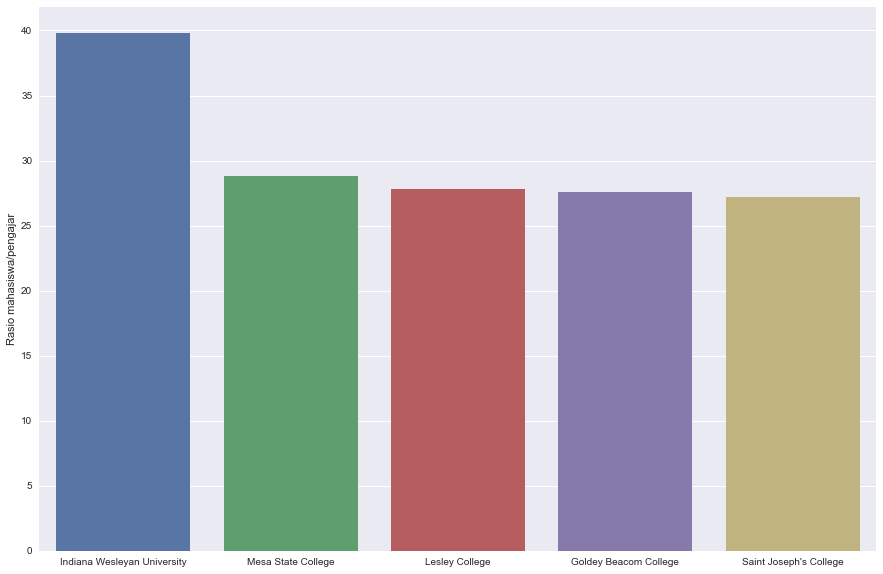

In [110]:
# Top 5 Universitas dengan Rasio mahasiswa/pengajar terbesar
plt.subplots(figsize = (15,10))
top5_SFRatio_data = df[['Unnamed: 0', 'S.F.Ratio']].sort_values(by ='S.F.Ratio', ascending = False).head(5)
plt1= sns.barplot(x = 'Unnamed: 0', y = 'S.F.Ratio', data = top5_SFRatio_data)
plt1.set(xlabel = '', ylabel= 'Rasio mahasiswa/pengajar')

[Text(0.5, 0, ''), Text(0, 0.5, 'Estimasi biaya pembelajaran per siswa')]

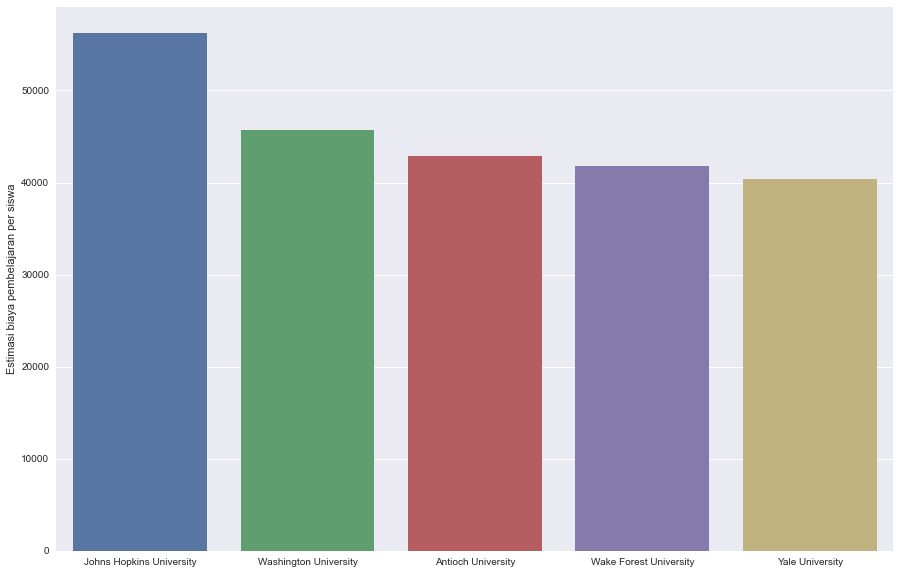

In [111]:
# Top 5 Universitas dengan Estimasi biaya pembelajaran per siswa termahal
plt.subplots(figsize = (15,10))
top5_Expend_data = df[['Unnamed: 0', 'Expend']].sort_values(by ='Expend', ascending = False).head(5)
plt1= sns.barplot(x = 'Unnamed: 0', y = 'Expend', data = top5_Expend_data)
plt1.set(xlabel = '', ylabel= 'Estimasi biaya pembelajaran per siswa')

[Text(0.5, 0, ''), Text(0, 0.5, 'Tingkat kelulusan ')]

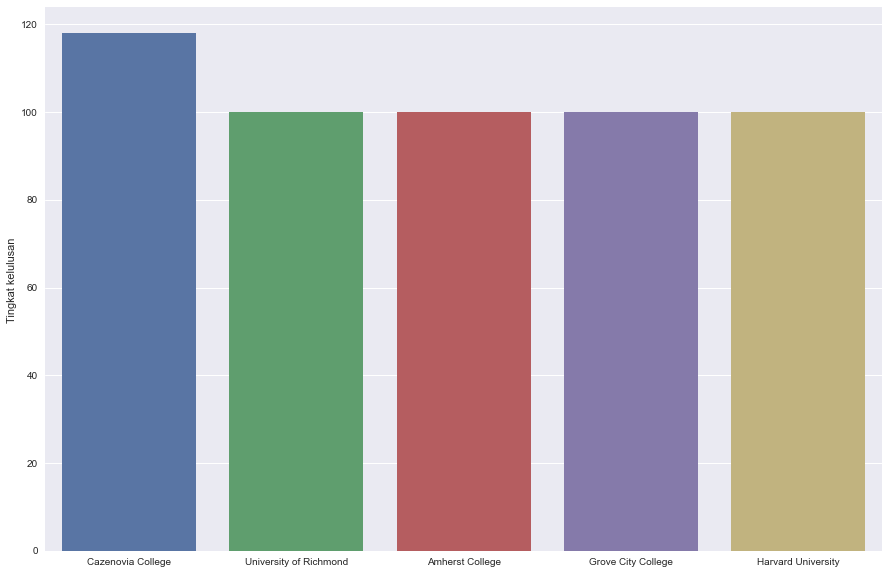

In [112]:
# Top 5 Universitas dengan Tingkat kelulusan Tertinggi
plt.subplots(figsize = (15,10))
top5_GradeRate_data = df[['Unnamed: 0', 'Grad.Rate']].sort_values(by ='Grad.Rate', ascending = False).head(5)
plt1= sns.barplot(x = 'Unnamed: 0', y = 'Grad.Rate', data = top5_GradeRate_data)
plt1.set(xlabel = '', ylabel= 'Tingkat kelulusan ')

##### Setelah sudah mendapatkan Insight tiap Kolom, cek korelasi antar kolom

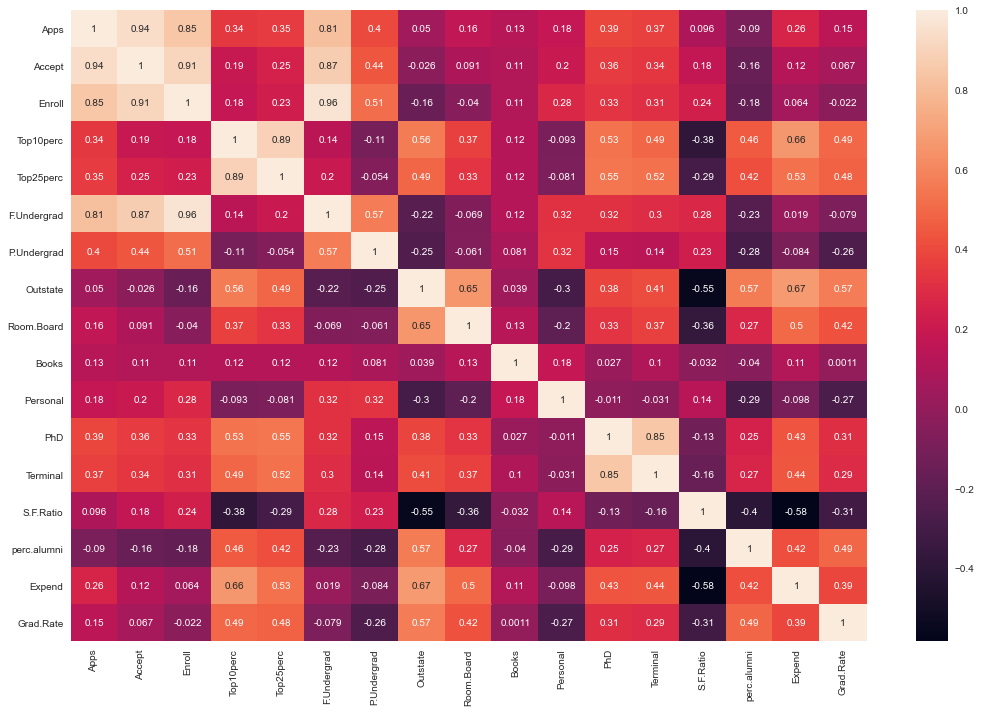

Korelasi Terkuat dan Positif ada pada variabel antara F.Undergrad & Enroll mencapai angkai 0.96


In [113]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(method= 'pearson'), annot= True)
plt.tight_layout()
plt.show()
print('Korelasi Terkuat dan Positif ada pada variabel antara F.Undergrad & Enroll mencapai angkai 0.96')

C:\Users\Ramadhoni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ramadhoni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ramadhoni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ramadhoni\

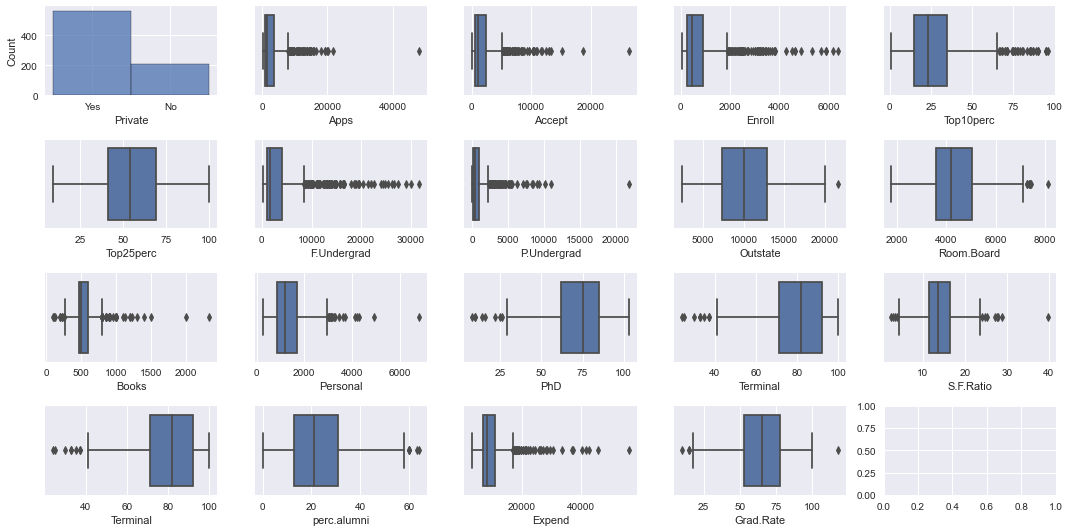

Dalam Visualisasi tersebut dapat disimpulkan mayoritas tiap kolom / Variabel memiliki data outliers yang berarti Mayoritas distribusi Dataset tersebut tidak Normal, tapi data outliers tersebut tidak dibuang / diubah karena tujuan nya adalah agar seluruh universitas bisa dicluster sesuai dengan karakteristik mereka masing-masing


In [114]:
#Check Distribusi Data tiap Kolom/Varibael dan Check Outliers menggunakan Boxplot 
fig, axs = plt.subplots(4,5, figsize = (15,7.5))
plt1 = sns.histplot(df['Private'], ax = axs[0,0])
plt2 = sns.boxplot(df['Apps'], ax = axs[0,1])
plt3 = sns.boxplot(df['Accept'], ax = axs[0,2])
plt4 = sns.boxplot(df['Enroll'], ax = axs[0,3])
plt5 = sns.boxplot(df['Top10perc'], ax = axs[0,4])
plt6 = sns.boxplot(df['Top25perc'], ax = axs[1,0])
plt8 = sns.boxplot(df['F.Undergrad'], ax = axs[1,1])
plt9 = sns.boxplot(df['P.Undergrad'], ax = axs[1,2])
plt10 = sns.boxplot(df['Outstate'], ax = axs[1,3])
plt11 = sns.boxplot(df['Room.Board'], ax = axs[1,4])
plt12 = sns.boxplot(df['Books'], ax = axs[2,0])
plt13 = sns.boxplot(df['Personal'], ax = axs[2,1])
plt14 = sns.boxplot(df['PhD'], ax = axs[2,2])
plt15 = sns.boxplot(df['Terminal'], ax = axs[2,3])
plt16 = sns.boxplot(df['S.F.Ratio'], ax = axs[2,4])
plt17 = sns.boxplot(df['Terminal'], ax = axs[3,0])
plt18 = sns.boxplot(df['perc.alumni'], ax = axs[3,1])
plt19 = sns.boxplot(df['Expend'], ax = axs[3,2])
plt20 = sns.boxplot(df['Grad.Rate'], ax = axs[3,3])

plt.tight_layout()
plt.show()

print('Dalam Visualisasi tersebut dapat disimpulkan mayoritas tiap kolom / Variabel memiliki data outliers yang berarti Mayoritas distribusi Dataset tersebut tidak Normal, tapi data outliers tersebut tidak dibuang / diubah karena tujuan nya adalah agar seluruh universitas bisa dicluster sesuai dengan karakteristik mereka masing-masing')


In [115]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# Data Preparation

### Encode Data

Pisahkan Data Kategorikal Biner, dan Data Numerikal, Kolom Unnamed: 0 diabaikan, karena sama seperti ID tidak diperlukan

In [116]:
#copy data
df2 = df.copy()

In [117]:
#kolom kategorikal biner
bin_cols = ['Private']
#kolom numerikal
num_cols = ['Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate']

**Label Encode**

Menggunakan teknik label encoding untuk encode data dengan kategorikal biner

In [118]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[bin_cols] = le.fit_transform(df[bin_cols])

C:\Users\Ramadhoni\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#### Scalling Data Numerikal

Karena Mayoritas Distribusi dataset tersebut tidak normal , maka menggunakan scalling dengan teknik Data Normalization menggunakan MinMaxScaller

In [119]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df[num_cols] = mms.fit_transform(df[num_cols])

In [120]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963
1,Adelphi University,1,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926
2,Adrian College,1,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407
3,Agnes Scott College,1,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704
4,Alaska Pacific University,1,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296


#### Data Sudah Ready untuk dilakukan PCA Dimentional Reduction

In [121]:
# Putting feature variable to X
X = df.drop('Unnamed: 0', axis =1)
# Putting College
college = df['Unnamed: 0']

In [122]:
X.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963
1,1,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926
2,1,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407
3,1,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704
4,1,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296


In [123]:
X

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963
1,1,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926
2,1,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407
3,1,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704
4,1,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,0.044071,0.054955,0.079912,0.031579,0.186813,0.093639,0.092878,0.230217,0.334174,0.180036,0.145038,0.547368,0.473684,0.495979,0.218750,0.024186,0.277778
773,1,0.039114,0.065999,0.103823,0.242105,0.417582,0.086021,0.050653,0.474174,0.501261,0.224599,0.152672,0.684211,0.671053,0.289544,0.484375,0.113164,0.675926
774,1,0.041989,0.070188,0.103823,0.347368,0.571429,0.084243,0.007557,0.235537,0.381463,0.232175,0.081069,0.621053,0.671053,0.319035,0.312500,0.096839,0.361111
775,1,0.221273,0.090677,0.201667,0.989474,0.989011,0.161186,0.003755,0.903926,0.745586,0.237968,0.284733,0.926316,0.947368,0.088472,0.765625,0.701265,0.824074


In [124]:
# Importing the PCA Module
from sklearn.decomposition import PCA
# declare PCA , to get how many PCA componenst is the best
pca = PCA(random_state = 123)

In [125]:
# Fit the model with X
pca.fit(X)

PCA(random_state=123)

In [126]:
# Check result
pca.components_

array([[-8.29082479e-01,  5.77577743e-02,  8.08840263e-02,
         1.57231686e-01, -1.30608394e-01, -1.21696474e-01,
         1.82131729e-01,  6.56325441e-02, -2.93867384e-01,
        -1.60699698e-01,  1.15399036e-03,  7.36261932e-02,
        -4.19339126e-03, -1.48505344e-02,  1.18175665e-01,
        -2.16729426e-01, -8.23191955e-02, -1.52045342e-01],
       [-2.60102216e-01,  1.28622956e-01,  1.30862184e-01,
         1.97010266e-01,  3.72250054e-01,  4.48963319e-01,
         1.97087167e-01,  3.10457867e-02,  2.58329934e-01,
         1.87375369e-01,  2.35433060e-02, -1.20950352e-03,
         3.57317671e-01,  3.97697629e-01, -5.60789596e-02,
         1.78112361e-01,  1.47976371e-01,  1.86855115e-01],
       [ 1.23051507e-01,  8.02664559e-02,  1.29970792e-01,
         1.22569056e-01, -3.54478048e-01, -4.57034819e-01,
         1.29991253e-01,  9.41770653e-02,  2.28457992e-01,
         4.91426044e-01,  2.87845603e-02,  2.01016031e-02,
         2.21966778e-01,  3.29228963e-01,  1.57937406e

In [127]:
# create DataFrame to show PC1 , PC2 dan Feature
nama_kolom = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':nama_kolom})
pcs_df

,PC1,PC2,Feature
0,-0.829082,-0.260102,Private
1,0.057758,0.128623,Apps
2,0.080884,0.130862,Accept
3,0.157232,0.197010,Enroll
4,-0.130608,0.372250,Top10perc
5,-0.121696,0.448963,Top25perc
6,0.182132,0.197087,F.Undergrad
7,0.065633,0.031046,P.Undergrad
8,-0.293867,0.258330,Outstate
9,-0.160700,0.187375,Room.Board


In [128]:
#Eigenvalue
pca.explained_variance_

array([2.64828541e-01, 1.53472609e-01, 3.19634247e-02, 3.06310130e-02,
       2.23412237e-02, 2.03039438e-02, 1.42263073e-02, 1.00496399e-02,
       8.97849901e-03, 6.70398048e-03, 5.52376800e-03, 4.62086224e-03,
       3.81824714e-03, 2.99537936e-03, 2.44039316e-03, 1.83447806e-03,
       6.53306164e-04, 2.26808543e-04])

In [129]:
#Proportion
pca.explained_variance_ratio_

array([4.52224936e-01, 2.62071982e-01, 5.45811929e-02, 5.23059480e-02,
       3.81501874e-02, 3.46712995e-02, 2.42930421e-02, 1.71609062e-02,
       1.53318110e-02, 1.14478112e-02, 9.43246381e-03, 7.89064925e-03,
       6.52009244e-03, 5.11495187e-03, 4.16724964e-03, 3.13258049e-03,
       1.11559478e-03, 3.87301453e-04])

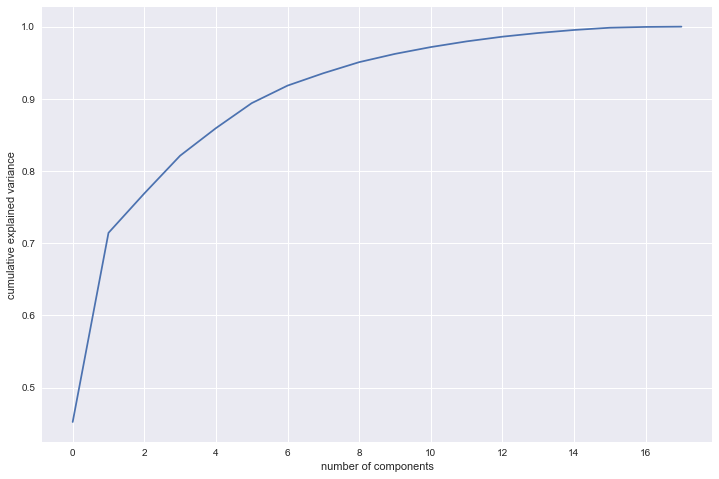

In [130]:
#Making the screeplot - plotting the cumulative variance against the number of components
plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)
plt.savefig('pca_no')
plt.show()


#### Looks like 8 components are enough to describe 95% of the variance in the dataset
We'll choose 8 components for our modeling


In [131]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
pca_final= PCA(n_components=8,random_state=123)

In [132]:
# declare model
df_pca = pca_final.fit_transform(X)

In [133]:
# Fit model with df_pca
df_pca = pd.DataFrame(df_pca)
#check hasil model
df_pca

,0,1,2,3,4,5,6,7
0,-0.082791,-0.266534,-0.009831,0.149839,-0.246007,0.107329,-0.093650,-0.017589
1,-0.225709,-0.631024,0.115994,0.328313,0.427487,-0.376753,0.218394,0.080898
2,-0.250373,-0.316418,-0.124522,0.037131,0.070341,0.048830,0.127183,-0.017588
3,-0.509568,0.456092,-0.132747,-0.132976,-0.209321,-0.075644,0.166052,0.099153
4,-0.056116,-0.444180,0.171920,0.077894,-0.430454,-0.083480,0.233776,0.028268
...,...,...,...,...,...,...,...,...
772,0.831831,-0.370952,0.011636,-0.186847,0.170175,-0.136369,0.086624,0.042696
773,-0.303883,-0.077164,0.065520,0.004383,0.151621,0.071768,-0.073301,0.024784
774,-0.164675,-0.169583,-0.089142,0.143641,-0.182236,0.022412,0.027183,0.141910
775,-0.749110,1.046318,-0.150996,0.087126,0.148542,-0.172928,0.242372,-0.133037


In [134]:
#Import Library for Hierarchi Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


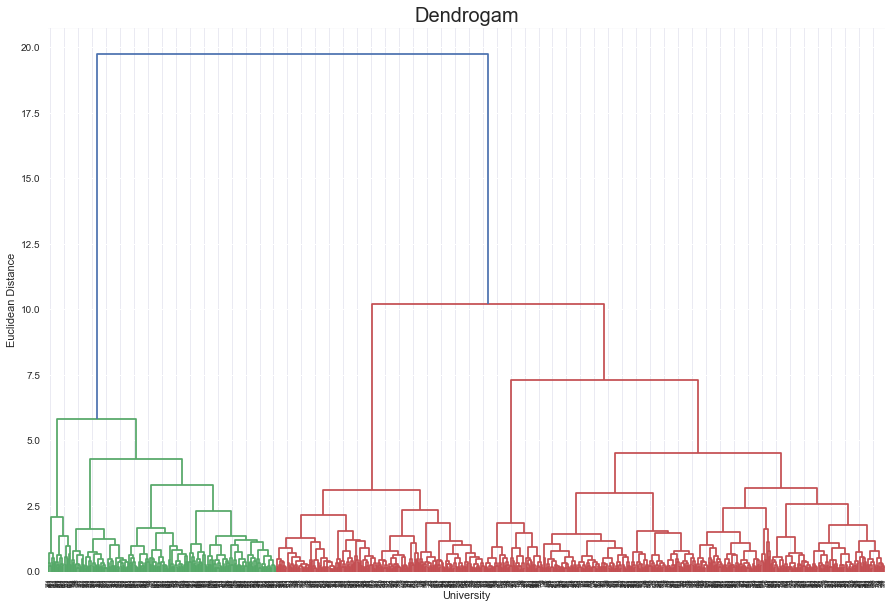

In [135]:
#Create Dendrogram Visualization to find the best "n"
plt.figure(figsize=(15,10))
cluster=linkage(df_pca, method = 'ward',metric='euclidean')
dendrogram = dendrogram(cluster)
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('University')
plt.ylabel('Euclidean Distance')
plt.show()


In [136]:
# Looking at the dedrogram it is observed that cutting it at n = 2 is most optimum.

In [163]:
#Modeling Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
#Use type Agglomerative with n=2 , euclidean distance, & ward linkage
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster_hc = hc.fit_predict(df_pca)
#Add cluster result to Dataframe
df_pca['cluster']=cluster_hc
#Merge Country and Cluster
pca_cluster_hc = pd.concat([df['Unnamed: 0'],df_pca['cluster']], axis=1, join='outer')
pca_cluster_hc


,Unnamed: 0,cluster
0,Abilene Christian University,0
1,Adelphi University,0
2,Adrian College,0
3,Agnes Scott College,0
4,Alaska Pacific University,0
...,...,...
772,Worcester State College,1
773,Xavier University,0
774,Xavier University of Louisiana,0
775,Yale University,0


In [164]:
#Merge to Original Data
clustered_data_hc = pca_cluster_hc.merge(df2, on = 'Unnamed: 0')
clustered_data_hc[bin_cols] = le.fit_transform(clustered_data_hc[bin_cols])
clustered_data_hc.head()

C:\Users\Ramadhoni\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Unnamed: 0,cluster,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,0,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,0,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,0,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,0,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [165]:
#See Characteristic of Cluster in each variables
hasil=clustered_data_hc.groupby(['cluster']).agg({"Private": "mean","Apps":"mean","Accept":"mean","Enroll":"mean",
                                                 "Top10perc":"mean","Top25perc":"mean","F.Undergrad":"mean",
                                                 "P.Undergrad":"mean","Outstate":"mean","Room.Board":"mean",
                                                 "Books":"mean","Personal":"mean","PhD":"mean",
                                                 "Terminal":"mean","S.F.Ratio":"mean","perc.alumni":"mean",
                                                 "Expend":"mean","Grad.Rate":"mean"}).reset_index()
hasil


,cluster,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0,1,1977.929204,1305.702655,456.945133,29.330973,56.957522,1872.168142,433.966372,11801.693805,4586.143363,547.506195,1214.440708,71.093805,78.534513,12.945487,25.890265,10486.353982,68.998230
1,1,0,5729.919811,3919.287736,1640.872642,22.834906,52.702830,8571.004717,1978.188679,6813.410377,3748.240566,554.377358,1676.981132,76.834906,82.816038,17.139151,14.358491,7458.316038,56.042453


In [166]:
#Rename column, agar bisa di panggil
hasil_akhir = hasil.rename(columns = {'F.Undergrad': 'F_Undergrad', 'P.Undergrad': 'P_Undergrad','Room.Board':'Room_Board', 'S.F.Ratio': 'S_F_Ratio', 'perc.alumni' : 'perc_alumni', 'Grad.Rate': 'Grad_Rate'}, inplace = False)

In [167]:
hasil_akhir

,cluster,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,0,1,1977.929204,1305.702655,456.945133,29.330973,56.957522,1872.168142,433.966372,11801.693805,4586.143363,547.506195,1214.440708,71.093805,78.534513,12.945487,25.890265,10486.353982,68.998230
1,1,0,5729.919811,3919.287736,1640.872642,22.834906,52.702830,8571.004717,1978.188679,6813.410377,3748.240566,554.377358,1676.981132,76.834906,82.816038,17.139151,14.358491,7458.316038,56.042453


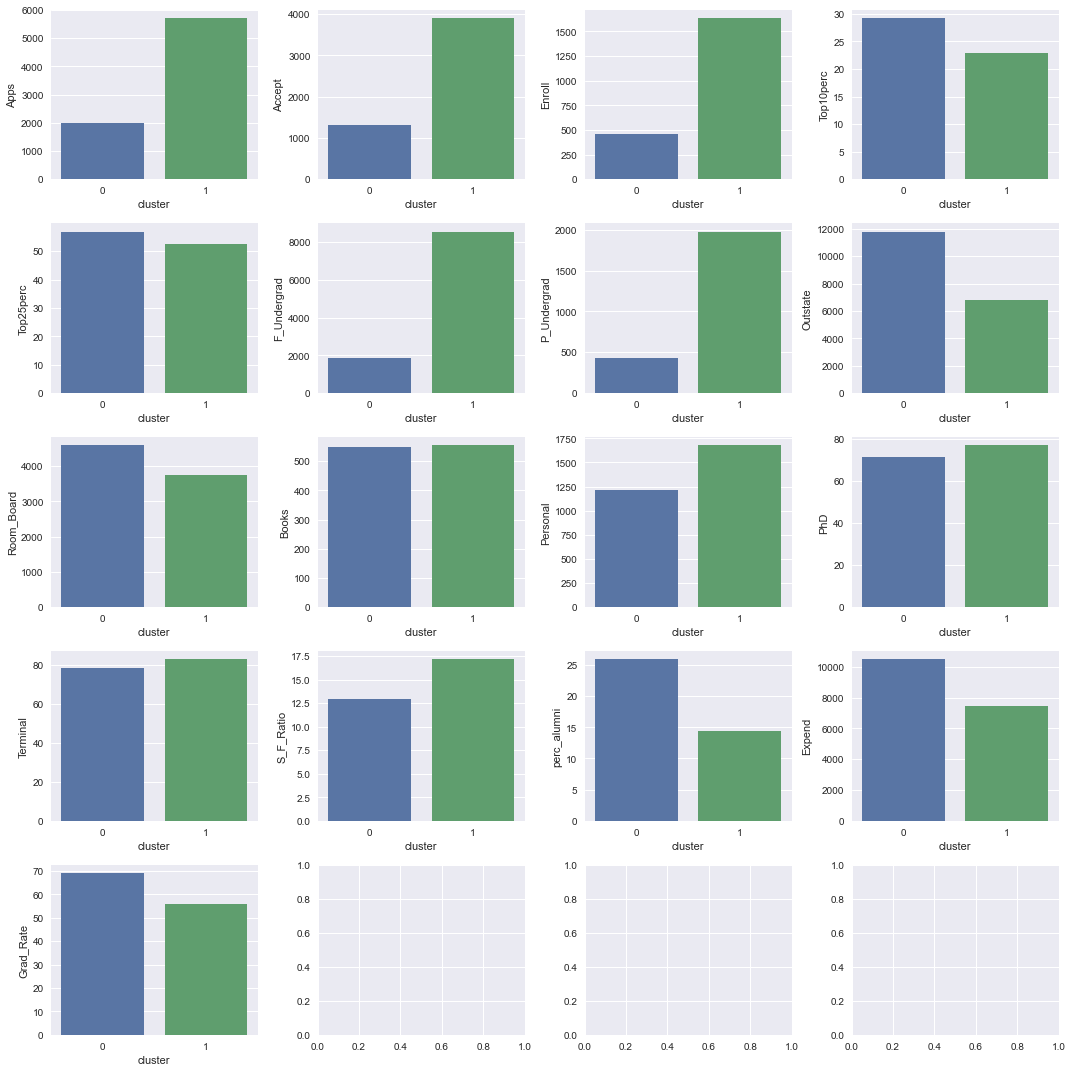

In [168]:
#Create visualization comparison between 2 cluster
fig, axs = plt.subplots(5,4,figsize = (15,15))

sns.barplot(x=hasil_akhir.cluster, y=hasil_akhir.Apps, ax = axs[0,0])
sns.barplot(x=hasil_akhir.cluster, y=hasil_akhir.Accept, ax = axs[0,1])
sns.barplot(x=hasil_akhir.cluster, y=hasil_akhir.Enroll, ax = axs[0,2])
sns.barplot(x=hasil_akhir.cluster, y=hasil_akhir.Top10perc, ax = axs[0,3])
sns.barplot(x=hasil_akhir.cluster, y=hasil_akhir.Top25perc, ax = axs[1,0])
sns.barplot(x=hasil_akhir.cluster, y=hasil_akhir.F_Undergrad, ax = axs[1,1])
sns.barplot(x=hasil_akhir.cluster, y=hasil_akhir.P_Undergrad, ax = axs[1,2])
sns.barplot(x=hasil_akhir.cluster, y=hasil_akhir.Outstate, ax = axs[1,3])
sns.barplot(x=hasil_akhir.cluster, y=hasil_akhir.Room_Board, ax = axs[2,0])
sns.barplot(x=hasil_akhir.cluster, y=hasil_akhir.Books, ax = axs[2,1])
sns.barplot(x=hasil_akhir.cluster, y=hasil_akhir.Personal, ax = axs[2,2])
sns.barplot(x=hasil_akhir.cluster, y=hasil_akhir.PhD, ax = axs[2,3])
sns.barplot(x=hasil_akhir.cluster, y=hasil_akhir.Terminal, ax = axs[3,0])
sns.barplot(x=hasil_akhir.cluster, y=hasil_akhir.S_F_Ratio, ax = axs[3,1])
sns.barplot(x=hasil_akhir.cluster, y=hasil_akhir.perc_alumni, ax = axs[3,2])
sns.barplot(x=hasil_akhir.cluster, y=hasil_akhir.Expend, ax = axs[3,3])
sns.barplot(x=hasil_akhir.cluster, y=hasil_akhir.Grad_Rate, ax = axs[4,0])

plt.tight_layout()


In [169]:
# check University name in cluster 0
clustered_data_hc[clustered_data_hc.cluster == 0]['Unnamed: 0'].values

array(['Abilene Christian University', 'Adelphi University',
       'Adrian College', 'Agnes Scott College',
       'Alaska Pacific University', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alderson-Broaddus College', 'Alfred University',
       'Allegheny College', 'Allentown Coll. of St. Francis de Sales',
       'Alma College', 'Alverno College',
       'American International College', 'Amherst College',
       'Anderson University', 'Andrews University', 'Antioch University',
       'Aquinas College', 'Arkansas College (Lyon College)',
       'Assumption College', 'Augsburg College', 'Augustana College IL',
       'Augustana College', 'Austin College', 'Averett College',
       'Baker University', 'Baldwin-Wallace College', 'Barat College',
       'Bard College', 'Barnard College', 'Barry University',
       'Baylor University', 'Beaver College', 'Bellarmine College',
       'Belmont Abbey College', 'Belmont University', 'Bel

In [170]:
# check University name in cluster 1
clustered_data_hc[clustered_data_hc.cluster == 1]['Unnamed: 0'].values

array(['Angelo State University', 'Appalachian State University',
       'Arizona State University Main campus', 'Arkansas Tech University',
       'Auburn University-Main Campus', 'Bemidji State University',
       'Bloomsburg Univ. of Pennsylvania',
       'Bowling Green State University',
       'California Polytechnic-San Luis',
       'California State University at Fresno', 'Castleton State College',
       'Central Connecticut State University',
       'Central Missouri State University',
       'Central Washington University', 'Christopher Newport University',
       'Clemson University',
       'Clinch Valley Coll. of  the Univ. of Virginia',
       'College of Charleston', 'College of William and Mary',
       'Colorado State University', 'Delta State University',
       'Dickinson State University', 'East Carolina University',
       'East Tennessee State University',
       'Eastern Connecticut State University',
       'Eastern Illinois University', 'Emporia State Universi

### Kesimpulan yang didapat menggunakan Clustering Menggunakan PCA & Hierarchical
#### Berdasarkan hasil Pemodelan Clustering, sebelumnya menggunakan Dimension Reduction PCA terlebih dahulu untuk dataset tersebut, dari 18 Variabel Feature, direduksi menjadi 1 Variabel Feature. Lalu dataframe variabel tersebut dipakai untuk Pemodelan Hierarchical Clustering . Dan jika dilihat dari Visualisasi Dendrogram didapatkan 2 Cluster untuk dataset College tersebut. Lalu, setelah dilihat dari Visualisasi perbandingan antara cluster 0 dan cluster 1 rata-rata tiap variabel, didapatkan : 

#### Universitas yang masuk pada cluster 0 seluruhnya ternyata merupakan universitas swasta dan Memiliki Jumlah Mahasiswa Pendaftar, dan Mahasiswa yang diterima jauh lebih sedikit dibanding Cluster 1 dilihat dari variabel Apps, Accept & Enroll,ini menandakan persaingan universitas tersebut sangat ketat , lalu dilihat dari top10perc(Persentase mahasiswa yang merupakan top 10% dari SMA asal) dan top25perc(Persentase mahasiswa yang merupakan top 25% dari SMA asal) cluster 0 lebih unggul dibanding cluster 1 yang menandakan universitas tersebut berisi siswa2 terbaik di SMA sebelumnya menandakan saingannya pintar-pintar. Lalu jumlah mahasiswa S1 full time & Part time cluster 0 jauh lebih sedikit dibanding cluster 1. Jika dilihat dari Biaya, Cluster 0 lebih mahal dibanding cluster 1, terlihat dari rata-rata biaya variabel Outstate, Room Board ,  & Expend, hanya biaya variabel Personal , dan Books saja cluster 1 lebih mahal tipis dibanding cluster 0 . Tetapi walaupun mahal , kualitas Dosen di kampus cluster 0 ternyata tidak sebagus cluster 1, dilihat dari variabel pHD dan Terminal , cluster 1 lebih unggul dibanding cluster 0 .

#### Maka saya sebagai Data scientist yang telah melakukan pemodelan clustering dari 770+ row data dan menganalisa data college tersebut menyarankan kepada masyarakat yang ingin mendaftar Universitas. Saya menyarankan untuk memilih Universitas yang ada di Cluster 1 Universitas Non-Swasta. Karena , yang pertama Universitas di cluster 1 menerima mahasiswa jauh lebih banyak dibanding cluster 0, menandakan probability / kemungkinan masuk juga besar. yang kedua , saingan nya di Cluster 1 tidak terlalu pintar, dibanding cluster 0 . dilihat dari variabel top10perc dan top25perc yang lebih kecil dibandingkan cluster 0 . yang ketiga, ini yang terpenting , Biaya di universitas Cluster 1 cenderung lebih murah dibanding cluster 0 . yang keempat walaupun murah, tapi tidak menandakan kualitas pengajar kampus tersebut jelek, ini dibuktikan dengan kualitas Dosen Cluster 1 justru lebih baik dibanding cluster 0 , dilihat dari variabel PhD & Terminal

## Menggunakan Algoritma K-Means

In [171]:
#Import Data
data = pd.read_csv(r'C:\Users\Ramadhoni\Documents\Bootcamp Data Scientist\Machine Learning\Unsupervised Learning\College.csv')

In [172]:
#Check Data
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [173]:
#copy data
data2 = data.copy()

In [174]:
#Label encode variable kategorikal biner
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data[bin_cols] = le.fit_transform(data[bin_cols])

C:\Users\Ramadhoni\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [175]:
#Scalling variabel numerical
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
data[num_cols] = mms.fit_transform(data[num_cols])

In [150]:
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963
1,Adelphi University,1,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926
2,Adrian College,1,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407
3,Agnes Scott College,1,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704
4,Alaska Pacific University,1,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296


In [151]:
# Putting feature variable value to X1
X1 = data.drop('Unnamed: 0', axis = 1).values

In [152]:
#check X1
X1

array([[1.        , 0.03288693, 0.04417701, ..., 0.1875    , 0.0726714 ,
        0.46296296],
       [1.        , 0.04384229, 0.07053089, ..., 0.25      , 0.13838671,
        0.42592593],
       [1.        , 0.0280549 , 0.03903572, ..., 0.46875   , 0.10460535,
        0.40740741],
       ...,
       [1.        , 0.04198863, 0.07018813, ..., 0.3125    , 0.09683865,
        0.36111111],
       [1.        , 0.22127341, 0.09067713, ..., 0.765625  , 0.70126492,
        0.82407407],
       [1.        , 0.06056693, 0.06790312, ..., 0.4375    , 0.02494015,
        0.82407407]])

### Check Elbow Method to find Best "n" clusters

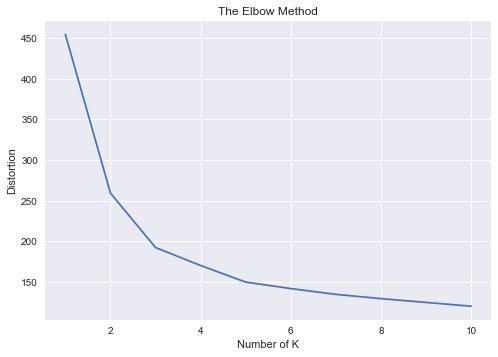

In [153]:
from sklearn.cluster import KMeans

distortion = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(X1)
    distortion.append(kmeans.inertia_)
    
plt.plot(range(1,11), distortion)
plt.title('The Elbow Method')
plt.xlabel('Number of K')
plt.ylabel('Distortion')
plt.show()

In [154]:
#check distortion
distortion

[454.435241508347,
 259.24366200462634,
 192.2890211651153,
 170.1738856560326,
 149.7921009670475,
 141.8056963444744,
 134.6927414407896,
 129.4396598905029,
 124.77973394140072,
 120.1272759872828]

### PIlih 5 Cluster

In [155]:
#modelling

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
# Compute cluster centers and predict cluster index for each sample to X1
y_kmeans = kmeans.fit_predict(X1)

In [156]:
#check hasil
y_kmeans

array([2, 2, 2, 4, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 4, 2, 2, 0, 1, 0,
       2, 3, 1, 0, 1, 3, 2, 1, 2, 1, 2, 2, 1, 2, 4, 4, 1, 1, 1, 1, 2, 2,
       1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 0, 2, 2, 4, 4, 3, 2, 1, 4, 2,
       2, 2, 1, 3, 4, 4, 4, 1, 1, 2, 1, 1, 3, 0, 1, 2, 2, 1, 1, 2, 4, 4,
       1, 2, 1, 4, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1, 0, 0, 0, 2, 4, 1, 1, 1,
       1, 2, 0, 2, 4, 1, 2, 1, 3, 0, 1, 1, 4, 4, 1, 0, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 4, 3, 1, 4, 3, 2, 1, 4, 2, 2, 2, 2, 4, 1, 1, 1, 2,
       2, 2, 2, 2, 4, 4, 2, 0, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 4, 1, 4, 1,
       0, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 1, 4, 0, 1, 1, 0, 1, 0,
       2, 2, 1, 3, 2, 3, 2, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1,
       2, 4, 3, 0, 2, 4, 2, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 4, 1, 1, 1, 2,
       4, 1, 1, 2, 1, 2, 1, 1, 4, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 0, 1, 2, 2, 0, 3, 2, 2, 3, 1, 3, 2, 0, 2, 1, 4, 0,
       2, 1, 3, 2, 0, 2, 4, 1, 1, 2, 1, 2, 1, 4, 2,

In [180]:
#create new column cluster and fill the predict result
data2['cluster'] = y_kmeans
data2.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,cluster
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,2
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,2
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,2
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,4
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,2


In [158]:
#label encode kolom kategorikal biner agar bisa di rata-ratakan
data2[bin_cols] = le.fit_transform(data2[bin_cols])

C:\Users\Ramadhoni\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [159]:
hasil_kmeans =data2.groupby(['cluster']).agg({"Private": "mean","Apps":"mean","Accept":"mean","Enroll":"mean",
                                                 "Top10perc":"mean","Top25perc":"mean","F.Undergrad":"mean",
                                                 "P.Undergrad":"mean","Outstate":"mean","Room.Board":"mean",
                                                 "Books":"mean","Personal":"mean","PhD":"mean",
                                                 "Terminal":"mean","S.F.Ratio":"mean","perc.alumni":"mean",
                                                 "Expend":"mean","Grad.Rate":"mean"}).reset_index()
hasil_kmeans

,cluster,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0,0.000000,3297.054054,2309.939189,1032.858108,16.655405,45.418919,5400.222973,1521.054054,6204.682432,3573.567568,526.263514,1593.101351,72.912162,79.121622,17.583784,13.270270,6501.020270,52.391892
1,1,1.000000,1969.686508,1474.948413,491.773810,30.833333,61.630952,1994.400794,465.246032,12596.642857,4806.031746,536.988095,1163.519841,78.753968,85.793651,12.944444,28.642857,10326.892857,73.722222
2,2,1.000000,944.586498,730.556962,286.358650,17.105485,41.978903,1194.599156,454.400844,9089.751055,3992.957806,542.721519,1330.388186,56.443038,65.362869,14.000422,18.641350,7568.265823,58.742616
3,3,0.015385,11294.523077,7606.461538,3071.030769,37.292308,69.738462,16079.969231,3007.892308,8130.615385,4143.369231,623.092308,1860.938462,85.753846,91.123077,16.178462,17.230769,9645.046154,64.000000
4,4,1.000000,5199.160000,2499.880000,823.533333,62.666667,88.253333,3262.506667,253.373333,17826.560000,5735.200000,593.800000,1019.066667,91.586667,95.800000,9.514667,39.360000,20277.573333,86.013333


In [160]:
##Rename column, agar bisa di panggil
hasil_kmeans_akhir = hasil_kmeans.rename(columns = {'F.Undergrad': 'F_Undergrad', 'P.Undergrad': 'P_Undergrad','Room.Board':'Room_Board', 'S.F.Ratio': 'S_F_Ratio', 'perc.alumni' : 'perc_alumni', 'Grad.Rate': 'Grad_Rate'}, inplace = False)

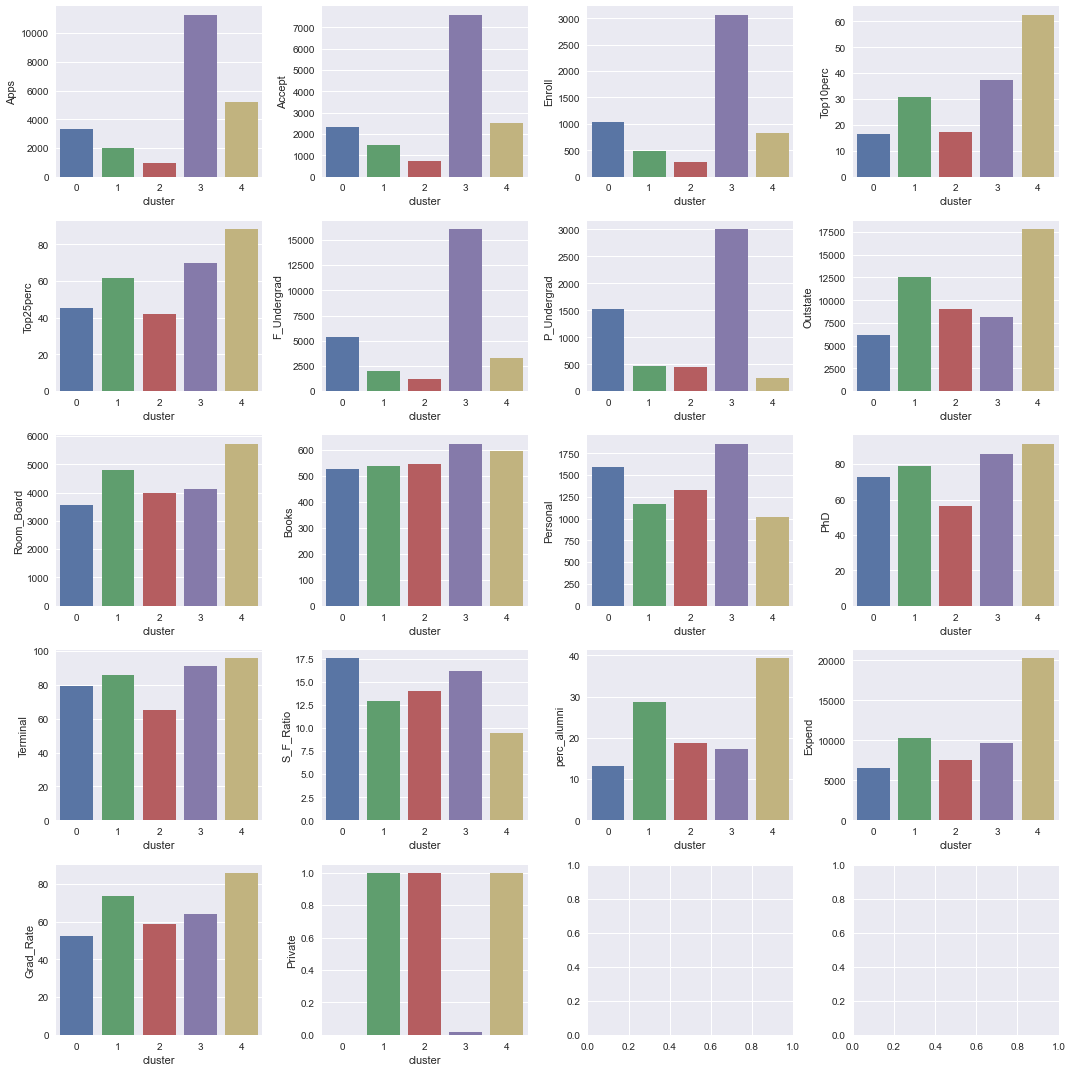

In [161]:
#check the visulatization result to compare 5 cluster
fig2, axs2 = plt.subplots(5,4,figsize = (15,15))

sns.barplot(x=hasil_kmeans_akhir.cluster, y=hasil_kmeans_akhir.Apps, ax = axs2[0,0])
sns.barplot(x=hasil_kmeans_akhir.cluster, y=hasil_kmeans_akhir.Accept, ax = axs2[0,1])
sns.barplot(x=hasil_kmeans_akhir.cluster, y=hasil_kmeans_akhir.Enroll, ax = axs2[0,2])
sns.barplot(x=hasil_kmeans_akhir.cluster, y=hasil_kmeans_akhir.Top10perc, ax = axs2[0,3])
sns.barplot(x=hasil_kmeans_akhir.cluster, y=hasil_kmeans_akhir.Top25perc, ax = axs2[1,0])
sns.barplot(x=hasil_kmeans_akhir.cluster, y=hasil_kmeans_akhir.F_Undergrad, ax = axs2[1,1])
sns.barplot(x=hasil_kmeans_akhir.cluster, y=hasil_kmeans_akhir.P_Undergrad, ax = axs2[1,2])
sns.barplot(x=hasil_kmeans_akhir.cluster, y=hasil_kmeans_akhir.Outstate, ax = axs2[1,3])
sns.barplot(x=hasil_kmeans_akhir.cluster, y=hasil_kmeans_akhir.Room_Board, ax = axs2[2,0])
sns.barplot(x=hasil_kmeans_akhir.cluster, y=hasil_kmeans_akhir.Books, ax = axs2[2,1])
sns.barplot(x=hasil_kmeans_akhir.cluster, y=hasil_kmeans_akhir.Personal, ax = axs2[2,2])
sns.barplot(x=hasil_kmeans_akhir.cluster, y=hasil_kmeans_akhir.PhD, ax = axs2[2,3])
sns.barplot(x=hasil_kmeans_akhir.cluster, y=hasil_kmeans_akhir.Terminal, ax = axs2[3,0])
sns.barplot(x=hasil_kmeans_akhir.cluster, y=hasil_kmeans_akhir.S_F_Ratio, ax = axs2[3,1])
sns.barplot(x=hasil_kmeans_akhir.cluster, y=hasil_kmeans_akhir.perc_alumni, ax = axs2[3,2])
sns.barplot(x=hasil_kmeans_akhir.cluster, y=hasil_kmeans_akhir.Expend, ax = axs2[3,3])
sns.barplot(x=hasil_kmeans_akhir.cluster, y=hasil_kmeans_akhir.Grad_Rate, ax = axs2[4,0])
sns.barplot(x=hasil_kmeans_akhir.cluster, y=hasil_kmeans_akhir.Private, ax = axs2[4,1])

plt.tight_layout()


In [184]:
# See list university in cluster 0 
data2[data2['cluster']==0]['Unnamed: 0'].values

array(['Angelo State University', 'Appalachian State University',
       'Arkansas Tech University', 'Bemidji State University',
       'Bloomsburg Univ. of Pennsylvania',
       'California State University at Fresno', 'Castleton State College',
       'Central Connecticut State University',
       'Central Missouri State University',
       'Central Washington University', 'Christopher Newport University',
       'Clinch Valley Coll. of  the Univ. of Virginia',
       'College of Charleston', 'Delta State University',
       'Dickinson State University', 'East Carolina University',
       'East Tennessee State University',
       'Eastern Connecticut State University',
       'Eastern Illinois University', 'Emporia State University',
       'Evergreen State College', 'Fayetteville State University',
       'Fort Lewis College', 'Francis Marion University',
       'George Mason University', 'Georgia State University',
       'Grand Valley State University', 'Illinois State University'

In [185]:
# See list university in cluster 1 
data2[data2['cluster']==1]['Unnamed: 0'].values

array(['Albertus Magnus College', 'Albion College', 'Albright College',
       'Alfred University', 'Allegheny College',
       'Allentown Coll. of St. Francis de Sales', 'Alma College',
       'Antioch University', 'Arkansas College (Lyon College)',
       'Assumption College', 'Augustana College IL', 'Austin College',
       'Baldwin-Wallace College', 'Barry University', 'Baylor University',
       'Beaver College', 'Bellarmine College', 'Beloit College',
       'Bentley College', 'Berry College', 'Birmingham-Southern College',
       'Blackburn College', 'Bradley University', 'Bridgewater College',
       'Buena Vista College', 'Butler University', 'Caldwell College',
       'California Lutheran University', 'Calvin College',
       'Canisius College', 'Capital University', 'Carroll College',
       'Carthage College', 'Catholic University of America',
       'Cedar Crest College', 'Centenary College of Louisiana',
       'Central College', 'Chapman University', 'Chatham College',
 

In [186]:
# See list university in cluster 2 
data2[data2['cluster']==2]['Unnamed: 0'].values

array(['Abilene Christian University', 'Adelphi University',
       'Adrian College', 'Alaska Pacific University', 'Albertson College',
       'Alderson-Broaddus College', 'Alverno College',
       'American International College', 'Anderson University',
       'Andrews University', 'Aquinas College', 'Augsburg College',
       'Augustana College', 'Averett College', 'Baker University',
       'Barat College', 'Belmont Abbey College', 'Belmont University',
       'Benedictine College', 'Bennington College', 'Bethany College',
       'Bethel College KS', 'Bethel College', 'Bethune Cookman College',
       'Bluefield College', 'Bluffton College', 'Bradford College',
       'Brenau University', 'Brewton-Parker College',
       'Briar Cliff College', 'Cabrini College', 'Campbell University',
       'Campbellsville College', 'Capitol College',
       'Carson-Newman College', 'Catawba College', 'Cazenovia College',
       'Cedarville College', 'Centenary College',
       'Center for Creative

In [187]:
# See list university in cluster 3 
data2[data2['cluster']==3]['Unnamed: 0'].values

array(['Arizona State University Main campus',
       'Auburn University-Main Campus', 'Bowling Green State University',
       'Brigham Young University at Provo',
       'California Polytechnic-San Luis', 'Clemson University',
       'College of William and Mary', 'Colorado State University',
       'Florida International University', 'Florida State University',
       'Georgia Institute of Technology',
       'Indiana University at Bloomington', 'Iowa State University',
       'James Madison University', 'Kansas State University',
       'Louisiana State University at Baton Rouge',
       'Miami University at Oxford', 'Michigan State University',
       'North Carolina State University at Raleigh', 'Ohio University',
       'Oklahoma State University',
       'Pennsylvania State Univ. Main Campus',
       'Purdue University at West Lafayette', 'Rutgers at New Brunswick',
       'San Diego State University', 'SUNY at Albany',
       'SUNY at Binghamton', 'SUNY at Buffalo', 'SUNY at S

In [188]:
# See list university in cluster 4
data2[data2['cluster']==4]['Unnamed: 0'].values

array(['Agnes Scott College', 'Amherst College', 'Bard College',
       'Barnard College', 'Boston University', 'Bowdoin College',
       'Brandeis University', 'Brown University', 'Bryn Mawr College',
       'Bucknell University', 'Carleton College',
       'Carnegie Mellon University', 'Case Western Reserve University',
       'Centre College', 'Claremont McKenna College', 'Colby College',
       'Colgate University', 'College of the Holy Cross',
       'Colorado College', 'Columbia University', 'Connecticut College',
       'Dartmouth College', 'Davidson College', 'Drew University',
       'Duke University', 'Emory University', 'Georgetown University',
       'Gettysburg College', 'Grinnell College', 'Hamilton College',
       'Harvard University', 'Harvey Mudd College',
       'Johns Hopkins University', 'Kenyon College', 'Lafayette College',
       'Lawrence University', 'Lehigh University', 'Macalester College',
       'Massachusetts Institute of Technology', 'Mount Holyoke Colle

### Kesimpulan

#### Setelah dilakukan pengecekan menggunakan Elbow Method dapat dilihat cluster terbaik adalah 5 cluster. dan setelah mesin mengelompokkan masing-masing Universitas didapatkan ciri-ciri antar 5 cluster tersebut sebagai berikut : 

#### Cluster 0 berisikan Universitas Non-swasta dengan pendaftar mahasiswa yang tidak terlalu banyak, dan juga tidak terlalu sedikit bisa dianggap tengah-tengah. dibuktikan dari variabel (Apps, Accept, Enroll, P.Undergrad, F.Undergrad peringkat ke 3). universitas di cluster ini berisikan siswa pintar yang tidak banyak dibuktikan dari variabel(top10perc & top25perc peringkat ke-4). Dengan harga / biaya termurah dibuktikan dari variabel(Outstate, Room, Books, Expend peringkat terakhir). dan wajar kualitas dosen nya juga tidak terlalu bagus karena peringkat ke-4 dibuktikan dari variabel(pHD & Terminal)

#### Cluster 1 berisikan Universitas Swasta dengan pendaftar mahasiswa yang sedikit dibuktikan dari variabel (Apps, Accept, Enroll, P.Undergrad, F.Undergrad peringkat ke 4). universitas di cluster ini berisikan siswa pintar yang menengah dibuktikan dari variabel(top10perc & top25perc peringkat ke-3). Dengan harga / biaya mengengah dibuktikan dari variabel(Outstate, Room, Expend peringkat kedua, tetapi murah biaya Personal dan books dibuktikan peringkat 4). dan harga tersebut sepadan karena kualitas pengajar / dosen nya juga menengah dibuktikan dengan variabel(phD & Terminal peringkat 3)

#### Cluster 2 berisikan Universitas Swasta dengan pendaftar mahasiswa palig sedikit dibuktikan dari variabel (Apps, Accept, Enroll,  F.Undergrad peringkat terakhir). universitas di cluster ini berisikan siswa pintar yang paling sedikit dibuktikan dari variabel(top10perc & top25perc peringkat terakhir). Dengan harga / biaya cenderung murah dibuktikan dari variabel(Outstate, Books, Personal peringkat ketiga, dan Room.Board & Expend peringkat 4). dan harga tersebut sepadan karena kualitas pengajar / dosen nya juga menengah dibuktikan dengan variabel(phD & Terminal peringkat 3). 

#### Cluster 3 mayoritas berisikan Universitas non-Swasta dengan pendaftar mahasiswa paling banyak dibuktikan dari variabel (Apps, Accept, Enroll,  F.Undergrad peringkat pertama). universitas di cluster ini berisikan siswa pintar yang cenderung pintar-pintar dibuktikan dari variabel(top10perc & top25perc peringkat kedua). Dengan harga / biaya yang menengah keatas dibuktikan dari variabel(Personal dan Books peringkat pertama). dan harga tersebut sepadan karena kualitas pengajar / dosen nya juga menengah dibuktikan dengan variabel(phD & Terminal peringkat 3). 

#### Cluster 4 berisikan Universitas Swasta dengan pendaftar mahasiswa cukup banyak dibuktikan dari variabel (Apps, Accept, peringkat kedua). universitas di cluster ini berisikan siswa yang pintar-pintar dibuktikan dari variabel(top10perc & top25perc peringkat pertama). Dengan harga / biaya paling mahal dibuktikan dengan variabel(Outstate Room.board, expend peringkat pertama). dan harga tersebut sepadan karena kualitas pengajar / dosen nya juga paling bagus dibuktikan dengan variabel(phD & Terminal peringkat pertama)

#### Berdasarkan kesimpulan dari 5 cluster tersebut, saya menyimpulkan & menyarankan kepada siswa yang ingin mendaftar universitas saya sarankan untuk universitas yang berada di cluster 3. karena menerima banyak pendaftar , dan banyak pula yang diterima dibuktikan dari variabel (apps & accept peringkat pertama) sehingga chance untuk masuk besar. kualitas siswa-siswa nya juga pintar. biaya nya bisa dibilang menengah dibuktikan dari variabel (oustate room.board expend peringkat 3 & 4). tetapi harga tersebut sebanding dengan kualitas dosen di cluster 3 dibuktikan dari variabel (pHD & Terminal).